In [1]:
import sys
#change the next line to reflect where you have downloaded the source code
sys.path.insert(0, '/Users/kvolk/Documents/GitHub/SBDynT/src')
import run_reb
import rebound
import numpy as np
import horizons_api
import tools




# **First, some basic functions that query JPL services for small bodies and planets**

In [2]:
# querying a small body's orbit from JPL's small body databse returns a flag 
# (1 for sucess, 0 for failure), the epoch, and the heliocentric cartesian coordinates 
# for the best fit plus however many clones is specified

#example with no clones
sbody = 'K14X40T'
(flag, epoch, x,y,z,vx,vy,vz) = horizons_api.query_sb_from_jpl(des=sbody,clones=0)
if(flag):
    print("queried %s and returned at epoch %f" % (sbody,epoch))
    print("cartesian heliocentric position (au), velocity (au/year):\n %e %e %e\n %e %e %e" % (x,y,z,vx,vy,vz))

queried K14X40T and returned at epoch 2457019.500000
cartesian heliocentric position (au), velocity (au/year):
 2.060804e+01 2.446023e+01 -4.340106e-01
 -8.946951e-01 8.022772e-01 -1.542420e-01


In [3]:
# example with 5 clones, first return is best fit, followed by 5
# clones sampled from the covariance matrix
clones = 5
ypx = np.zeros(clones+1); tpy = np.zeros(clones+1); tpz = np.zeros(clones+1);
tpvx = np.zeros(clones+1); tpvy = np.zeros(clones+1); tpvz = np.zeros(clones+1);
(flag, epoch, tpx,tpy,tpz,tpvx,tpvy,tpvz) = horizons_api.query_sb_from_jpl(des=sbody,clones=clones)
if(flag):
    print("queried %s and returned at epoch %f" % (sbody,epoch))
    print("cartesian heliocentric position (au), velocity (au/year) best fit, then clones")
    
    for i in range (0,clones):
        print("%e %e %e %e %e %e" % (tpx[i],tpy[i],tpz[i],tpvx[i],tpvy[i],tpvz[i]))

queried K14X40T and returned at epoch 2457019.500000
cartesian heliocentric position (au), velocity (au/year) best fit, then clones
2.060804e+01 2.446023e+01 -4.340106e-01 -8.946951e-01 8.022772e-01 -1.542420e-01
2.060811e+01 2.446031e+01 -4.340121e-01 -8.947005e-01 8.022768e-01 -1.542420e-01
2.060800e+01 2.446018e+01 -4.340115e-01 -8.946934e-01 8.022768e-01 -1.542422e-01
2.060795e+01 2.446012e+01 -4.340093e-01 -8.946951e-01 8.022674e-01 -1.542414e-01
2.060796e+01 2.446014e+01 -4.340097e-01 -8.946937e-01 8.022730e-01 -1.542423e-01


In [11]:
# If you want just a best-fit orbit at a specific epoch for one or more 
# small bodies, you can query JPL Horizons instead (it is currently not possible
# to add clones at a specific epoch or for multiple objects at once due to the
# fact that the covariance matrix for each object is at a non-use-determined
# eopch that differs for each small body. We plan to add this capability at a 
# later date by integrating bodies to a common epoch after cloning)
#
# Note that this will not exactly match the position above becayse often
# Horizons uses a different orbit-fit than the small body database
#
# single object example
sbody = 'K14X40T'
(flag, x,y,z,vx,vy,vz) = horizons_api.query_sb_from_horizons(des=sbody, epoch=2457019.5)
if(flag):
    print("queried %s and returned at epoch %f" % (sbody,epoch))
    print("cartesian heliocentric position (au), velocity (au/year):\n %e %e %e\n %e %e %e" % (x,y,z,vx,vy,vz))
print("\n\n")
# multiple objects example
list_of_sbodies = ['K14X40T','15760']
ntp = len(list_of_sbodies)
x = np.zeros(ntp); y = np.zeros(ntp); z = np.zeros(ntp)
vx = np.zeros(ntp); vy = np.zeros(ntp); vz = np.zeros(ntp)
(flag, x,y,z,vx,vy,vz) = horizons_api.query_sb_from_horizons(des=list_of_sbodies, epoch=2457019.5)
if(flag):
    for n in range(0,ntp):
        print("queried %s and returned at epoch %f" % (list_of_sbodies[n],epoch))
        print("cartesian heliocentric position (au), velocity (au/year):\n %e %e %e\n %e %e %e" 
              % (x[n],y[n],z[n],vx[n],vy[n],vz[n]))

queried K14X40T and returned at epoch 2457019.500000
cartesian heliocentric position (au), velocity (au/year):
 2.060804e+01 2.446023e+01 -4.340106e-01
 -8.946951e-01 8.022772e-01 -1.542420e-01



queried K14X40T and returned at epoch 2457019.500000
cartesian heliocentric position (au), velocity (au/year):
 2.060804e+01 2.446023e+01 -4.340106e-01
 -8.946951e-01 8.022772e-01 -1.542420e-01
queried 15760 and returned at epoch 2457019.500000
cartesian heliocentric position (au), velocity (au/year):
 3.516789e+01 2.149002e+01 8.339273e-01
 -5.000722e-01 8.746104e-01 3.328925e-02


In [9]:
# You can then query the planet properties and positions for the epoch 
# returned by the small body's orbit query (showing just Jupiter as an example)
planet = 'jupiter'
(flag, mass, radius, [plx,ply,plz],[plvx,plvy,plvz]) = horizons_api.query_horizons_planets(obj=planet,epoch=epoch)
if(flag):
    print("queried %s and returned at epoch %f" % (planet,epoch))
    print("mass (solar masses) %e and radius (au) %e" % (mass,radius))
    print("cartesian heliocentric position (au), velocity (au/year):\n %e %e %e\n %e %e %e" % (plx,ply,plz,plvx,plvy,plvz))

queried jupiter and returned at epoch 2457019.500000
mass (solar masses) 9.547919e-04 and radius (au) 4.778945e-07
cartesian heliocentric position (au), velocity (au/year):
 -3.707603e+00 3.813809e+00 6.712439e-02
 -2.011063e+00 -1.792771e+00 5.244496e-02


# **Now some tools to directly set up a rebound integration**
The calls above are integrated into these functions

In [12]:
# Example of setting up an integration with clones for a single object

#Set up an empty simulation, specify the small body and number of clones
sim= rebound.Simulation()
list_of_sbodies = ['K14X40T','15760']

#initialize the simulation with the giant planets (can include all the major planets)
flag, epoch, sim = run_reb.initialize_simulation_at_epoch(planets=['Jupiter','Saturn','Uranus','Neptune'],
                                                 des=list_of_sbodies, clones=clones)

#print out the simulation status
sim.status()


---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Jan 26 2022 16:46:16
Number of particles: 	11
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.400000
---------------------------------
<rebound.particle.Particle object at 0x7fefc4fcd7c0, m=1.000005976998622 x=0.002826512970347713 y=-0.0008747739485207273 z=-0.00013692912700458414 vx=0.00145612962394368 vy=0.001916921598432602 vz=-3.620122668487199e-05>
<rebound.particle.Particle object at 0x7fefc4fcd5c0, m=0.0009547919099366768 x=-3.7047781817306342 y=3.8129326481859396 z=0.06698756999874116 vx=-2.009602063755846 vy=-1.7908675015935938 vz=0.05240930332261569>
<rebound.particle.Particle object at 0x7fefc4fcd7c0, m=0.0002858856700231729 x=-5.4228120393942225 y=-8.337885360947089 z=0.3607936715678461 vx=1.5968424935163692 vy=-1.1166650583768498 vz=-0.04413456928460216>
<rebound.particle.Particle object at 0x7fefc4fcd5c0, m=4.3662496132004074e-05 x=19.31080

In [13]:
#You could proceed from here with regular rebound scripts, but we have also included some tools
#to directly run the rebound simulations, writing outputs to a simulation archive binary file
#and using a C-based heartbeat function to remove particles based on heliocentric distance

#max time in the integration (years)
tmax = 1e6

#how often you want to save the simulation archive file
tout = 1e3
savefile = "archive.bin"

#inner boundary (au)
remove_in = 20
#outer boundary (au)
remove_out = 1000


#sun the simulation, deleting any existing simulation archive and removeing 
sim = run_reb.run_simulation(sim, tmax=tmax, tout=tout,filename=savefile,
                             deletefile=True,mindist=remove_in,maxdist=remove_out)

In [18]:
# Example of setting up an integration with a list of small bodies (no clones allowed)

#Set up an empty simulation, specify the small body and number of clones
sim= rebound.Simulation()
sbody = 'K14X40T'
clones = 5

#initialize the simulation with the giant planets (can include all the major planets)
flag, epoch, sim = run_reb.initialize_simulation_at_epoch(planets=['Jupiter','Saturn','Uranus','Neptune'],
                                                 des=sbody, epoch=2457019.)

#print out the simulation status
sim.status()


---------------------------------
REBOUND version:     	3.19.2
REBOUND built on:    	Jan 26 2022 16:46:16
Number of particles: 	6
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.400000
---------------------------------
<rebound.particle.Particle object at 0x7fefc5ed10c0, m=1.000005976998622 x=0.002824518715433054 y=-0.0008773972652772384 z=-0.00013687955068490297 vx=0.001457476674232274 vy=0.001915744019670863 vz=-3.622977279637208e-05>
<rebound.particle.Particle object at 0x7fefc5f831c0, m=0.0009547919099366768 x=-3.702026275503939 y=3.815383274653286 z=0.06691580908390397 vx=-2.010932788679463 vy=-1.789497599770379 vz=0.05243338932030764>
<rebound.particle.Particle object at 0x7fefc5ed10c0, m=0.0002858856700231729 x=-5.424997794055814 y=-8.33635641686082 z=0.3608540749556554 vx=1.596545045759086 vy=-1.1171222397151843 vz=-0.044114779664304334>
<rebound.particle.Particle object at 0x7fefc5f831c0, m=4.3662496132004074e-05 x=19.3113371353

# **Example plots from the above single-object integration**

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
abf = np.zeros(1);ebf = np.zeros(1);incbf = np.zeros(1);
t = np.zeros(1);

a = np.zeros(shape=[1,clones]);e = np.zeros(shape=[1,clones]);inc = np.zeros(shape=[1,clones]);


sa = rebound.SimulationArchive(savefile)
r2d = 180/np.pi

print(sa.tmin)
print(sa.tmax)
for j,sim in enumerate(sa):
    p = sim.particles[sbody+"_bf"]
    com = sim.calculate_com()
    o = p.calculate_orbit(com)
    t = np.append(t, sim.t)
    abf = np.append(abf, o.a)
    ebf = np.append(ebf, o.e)
    incbf = np.append(incbf, o.inc*r2d)
    ta = np.zeros(shape=[1,clones]);te = np.zeros(shape=[1,clones]);ti = np.zeros(shape=[1,clones]);
    for i in range (0,clones):
        p = sim.particles[sbody+"_"+str(i+1)]
        o = p.calculate_orbit(com)
        ta[0,i] = o.a
        te[0,i] = o.e
        ti[0,i] = o.inc*r2d
    if(j==0):
        a = ta; e = te; inc = ti;
    else:
        a = np.append(a, ta, axis=0)
        e = np.append(e, te, axis=0)
        inc = np.append(inc, ti, axis=0)



t = np.delete(t,0)
abf= np.delete(abf,0)
ebf = np.delete(ebf,0)
incbf = np.delete(incbf,0)




0.0
1000000.0


/Users/kvolk/opt/anaconda3/envs/sbdynt/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


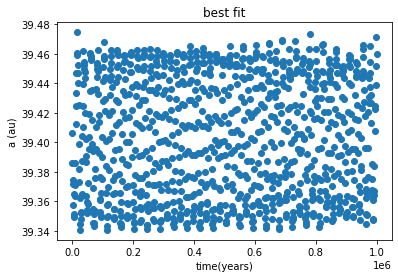

In [19]:
plt.scatter(t,abf);
plt.xlabel('time(years)');
plt.ylabel('a (au)');
plt.title('best fit');

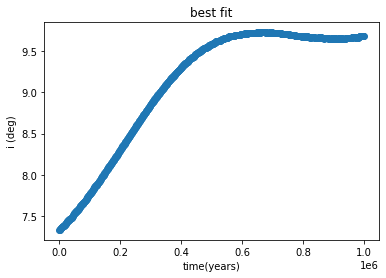

In [20]:
plt.scatter(t,incbf);
plt.xlabel('time(years)');
plt.ylabel('i (deg)');
plt.title('best fit');

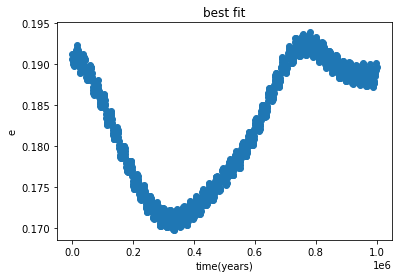

In [21]:
plt.scatter(t,ebf);
plt.xlabel('time(years)');
plt.ylabel('e');
plt.title('best fit');

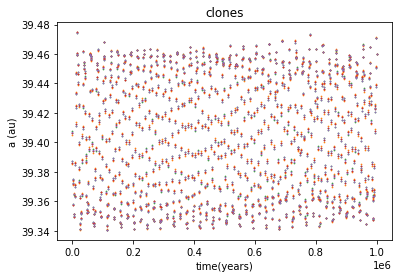

In [22]:
for i in range (0,clones):
    plt.scatter(t,a[:,i],s=0.5);
plt.xlabel('time(years)');
plt.ylabel('a (au)');
plt.title('clones');

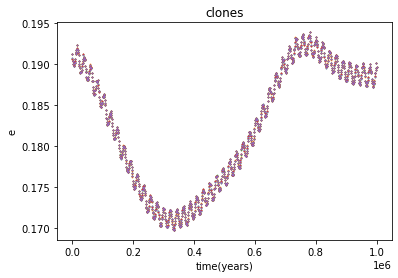

In [23]:
for i in range (0,clones):
    plt.scatter(t,e[:,i],s=0.5);
plt.xlabel('time(years)');
plt.ylabel('e');
plt.title('clones');

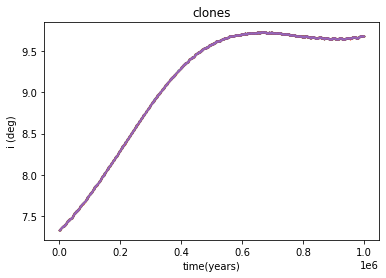

In [24]:
for i in range (0,clones):
    plt.scatter(t,inc[:,i],s=0.5);
plt.xlabel('time(years)');
plt.ylabel('i (deg)');
plt.title('clones');